# 1.Importación librerías

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# 2.Importación fuente de datos

In [18]:
import os, zipfile

cache_dir = r"C:\Users\Iván Pinar\keras_datasets"

# Descargar solo el zip
zip_path = tf.keras.utils.get_file(
    origin="https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip",
    fname="jena_climate_2009_2016.csv.zip",
    cache_dir=cache_dir,
    cache_subdir="",
    extract=False
)

# Extraer manualmente
with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall(cache_dir)

csv_path = os.path.join(cache_dir, "jena_climate_2009_2016.csv")

In [19]:
csv_path

'C:\\Users\\Iván Pinar\\keras_datasets\\jena_climate_2009_2016.csv'

In [20]:
df = pd.read_csv(csv_path)

In [21]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [23]:
60/10*24*30 #Número muestras de 10' para completar 1 mes

4320.0

In [24]:
# slice [start:stop:step], cogemos desde el índice 0 cada 144 registros para tener datos diarios
# slice [start:stop:step], cogemos desde el índice 0 cada 4320 registros para tener datos mensuales
df = df[0::4320]
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df=df.drop(["Date Time"],axis=1)

In [25]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
2009-01-31 00:10:00,997.40,-2.50,270.86,-4.01,89.3,5.08,4.54,0.54,2.83,4.55,1281.53,2.13,3.25,39.53
2009-03-02 00:10:00,984.11,3.60,278.03,2.07,89.7,7.91,7.09,0.81,4.50,7.21,1235.34,2.24,3.38,177.60
2009-04-01 00:10:00,994.63,3.05,276.64,-0.48,77.5,7.61,5.90,1.71,3.70,5.93,1251.62,0.35,0.63,118.50
2009-05-01 00:10:00,992.96,9.66,283.39,8.63,93.3,12.02,11.21,0.81,7.05,11.29,1217.85,0.70,1.13,138.80


# 3.Preprocesado

## 3.1Visualización de la secuencia

In [26]:
#Nos quedaremos únicamente con la columna "T (degC)" para hacer el forecast de 1 única variable

In [27]:
df = df["T (degC)"].to_frame()

In [28]:
df

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2016-08-20 10:10:00,21.81
2016-09-19 10:10:00,11.80
2016-10-19 10:10:00,8.81


<Axes: xlabel='Date Time'>

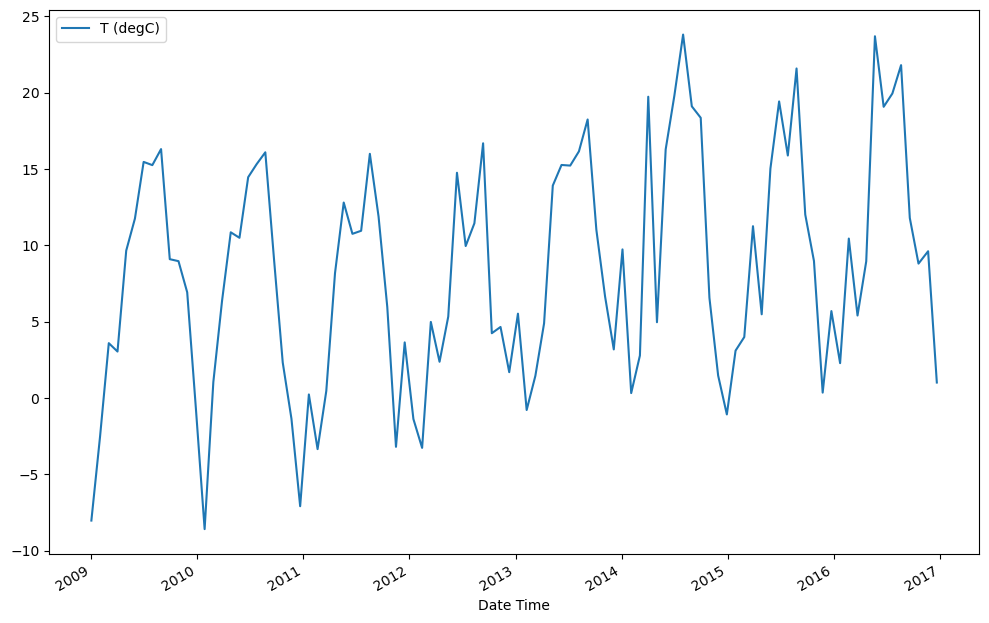

In [29]:
df.plot(figsize=(12,8))

# 4.Train Test Split

In [30]:
len(df)

98

In [31]:
98/(12)

8.166666666666666

In [32]:
#El dataset es a nivel mensual (98 puntos = 8,17 años de datos), seleccionamos un conjunto de test de 1,5 años =  18 muestras
tamaño_test = 18

In [33]:
test_ind = len(df)- tamaño_test

In [34]:
test_ind

80

In [35]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [36]:
train

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2015-02-27 10:10:00,4.00
2015-03-29 10:10:00,11.26
2015-04-28 10:10:00,5.49


In [37]:
test

,T (degC)
Date Time,
2015-07-27 10:10:00,15.89
2015-08-26 10:10:00,21.59
2015-09-25 10:10:00,12.02
2015-10-25 10:10:00,8.98
2015-11-24 10:10:00,0.36
2015-12-24 10:10:00,5.70
2016-01-23 10:10:00,2.29
2016-02-22 10:10:00,10.45
2016-03-23 10:10:00,5.41


# 5.Escalado

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# Solo utilizamos train data para el ajuste del escalado, sino estaríamos asumiendo información acerca del conjunto de test
scaler.fit(train)

MinMaxScaler()

In [41]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [42]:
scaled_train.min()

np.float64(0.0)

# 6. Creación Generador Serie Temporal

In [43]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [44]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.legacy.preprocessing.sequence:

class TimeseriesGenerator(keras.src.trainers.data_adapters.py_dataset_adapter.PyDataset)
 |  TimeseriesGenerator(
 |      data,
 |      targets,
 |      length,
 |      sampling_rate=1,
 |      stride=1,
 |      start_index=0,
 |      end_index=None,
 |      shuffle=False,
 |      reverse=False,
 |      batch_size=128
 |  )
 |
 |  Utility class for generating batches of temporal data.
 |
 |  DEPRECATED.
 |
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |
 |  Arguments:
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps i

In [45]:
# Suponemos coger una ventana de 12 meses atrás para predecir el siguiente mes (1 muestra)
longitud = 12
tamaño_batch = 1
generador = TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=longitud, batch_size=tamaño_batch)

In [46]:
# ¿Qué obtenemos del primer batch (coge 12 primeras muestras de train para predecir la muestra 13)?
X,y = generador[0]

In [47]:
print(f'Dado el array de entrada: \n{X.flatten()}')
print(f'Predecimos: \n {y}')

Dado el array de entrada: 
[0.01728929 0.18771226 0.37604199 0.35906144 0.56313677 0.6279716
 0.74251312 0.73602964 0.76844705 0.54584748 0.5418339  0.4788515 ]
Predecimos: 
 [[0.24328496]]


# 7.Creación del modelo

In [52]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import LSTM, Dense

In [49]:
# Definimos el número de variables de salida a predecir (1 variable = "T Deg")
n_variables = 1 #Si hubiera múltiples variables cogeríamos el número de columnas: scaled_train.shape[1]

In [53]:
# Definir modelo
model = Sequential([
    Input(shape=(longitud, n_variables)),
    LSTM(150, activation='relu'),
    Dense(n_variables)
])

model.compile(optimizer='adam', loss='mse')

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

# 8. Entrenamiento del modelo

NOTA: El tamaño del conjunto de test debe ser superior a la "longitud" elegida para los batches.

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [57]:
#Definimos generador para el conjunto de test de tal manera que nos sirva para la validación del modelo
val_generador = TimeseriesGenerator(scaled_test,scaled_test, length=longitud, batch_size=tamaño_batch)

In [58]:
model.fit(generador,epochs=20,
                    validation_data=val_generador,
                    callbacks=[early_stop])

Epoch 1/20


C:\Users\Iván Pinar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0967 - val_loss: 0.0503
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 - val_loss: 0.0485
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0425 - val_loss: 0.0436
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0408 - val_loss: 0.0231
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315 - val_loss: 0.0407
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0456 - val_loss: 0.1179
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - val_loss: 0.0131
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0253 - val_loss: 0.0433
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313 - val_loss: 0.0224
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299 - val_loss: 0.0122
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0099
Epoch 12/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0270 - val_loss: 0.0159


In [59]:
losses = pd.DataFrame(model.history.history)

<Axes: >

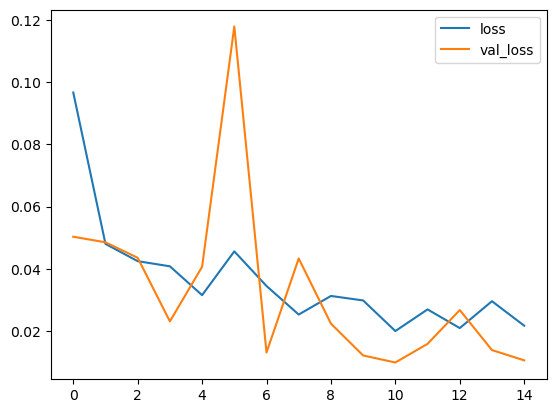

In [60]:
losses.plot()

# 9. Evaluación del modelo

## 9.1 Predicción sobre el conjunto de Test

In [61]:
primer_batch = scaled_train[-longitud:]

In [62]:
primer_batch.shape

(12, 1)

In [63]:
primer_batch = primer_batch.reshape((1, longitud, n_variables))

In [64]:
primer_batch.shape

(1, 12, 1)

In [65]:
model.predict(primer_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.83677304]], dtype=float32)

In [66]:
scaled_test[0] #Verificamos el valor real

array([0.75548009])

Ahora definimos esta lógica en un bucle FOR para predecir en todo el conjunto de test

In [67]:
test_predictions = []

primer_batch = scaled_train[-longitud:]
batch_actual = primer_batch.reshape((1, longitud, n_variables))

for i in range(len(test)):
    
    # Hacemos la predicción 1 time stamp (el siguiente mes). Indicar [0] para coger el valor de la predicción en lugar del array
    pred_actual = model.predict(batch_actual)[0]
    
    # Guardamos la predicción en la lista test_predictions
    test_predictions.append(pred_actual) 
    
    # Actualizamos el batch para descartar el primer valor e incluir la nueva predicción (desplazamiento)
    batch_actual = np.append(batch_actual[:,1:,:],[[pred_actual]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [68]:
test_predictions

[array([0.83677304], dtype=float32),
 array([0.8494015], dtype=float32),
 array([0.79273045], dtype=float32),
 array([0.5083823], dtype=float32),
 array([0.35581475], dtype=float32),
 array([0.32095414], dtype=float32),
 array([0.38240072], dtype=float32),
 array([0.4392179], dtype=float32),
 array([0.5267091], dtype=float32),
 array([0.64695346], dtype=float32),
 array([0.7670597], dtype=float32),
 array([0.8149221], dtype=float32),
 array([0.84104383], dtype=float32),
 array([0.84439623], dtype=float32),
 array([0.77527046], dtype=float32),
 array([0.5382856], dtype=float32),
 array([0.38592014], dtype=float32),
 array([0.3537831], dtype=float32)]

In [69]:
#Desescalamos las predicciones para obtener los valores reales ("true_predictions")
true_predictions = scaler.inverse_transform(test_predictions)

In [70]:
test['Predicción'] = true_predictions

C:\Users\Iván Pinar\AppData\Local\Temp\ipykernel_3416\2899863389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicción'] = true_predictions


In [71]:
test

,T (degC),Predicción
Date Time,,
2015-07-27 10:10:00,15.89,18.523079
2015-08-26 10:10:00,21.59,18.932114
2015-09-25 10:10:00,12.02,17.096539
2015-10-25 10:10:00,8.98,7.886503
2015-11-24 10:10:00,0.36,2.944840
2015-12-24 10:10:00,5.70,1.815705
2016-01-23 10:10:00,2.29,3.805959
2016-02-22 10:10:00,10.45,5.646268
2016-03-23 10:10:00,5.41,8.480107


<Axes: xlabel='Date Time'>

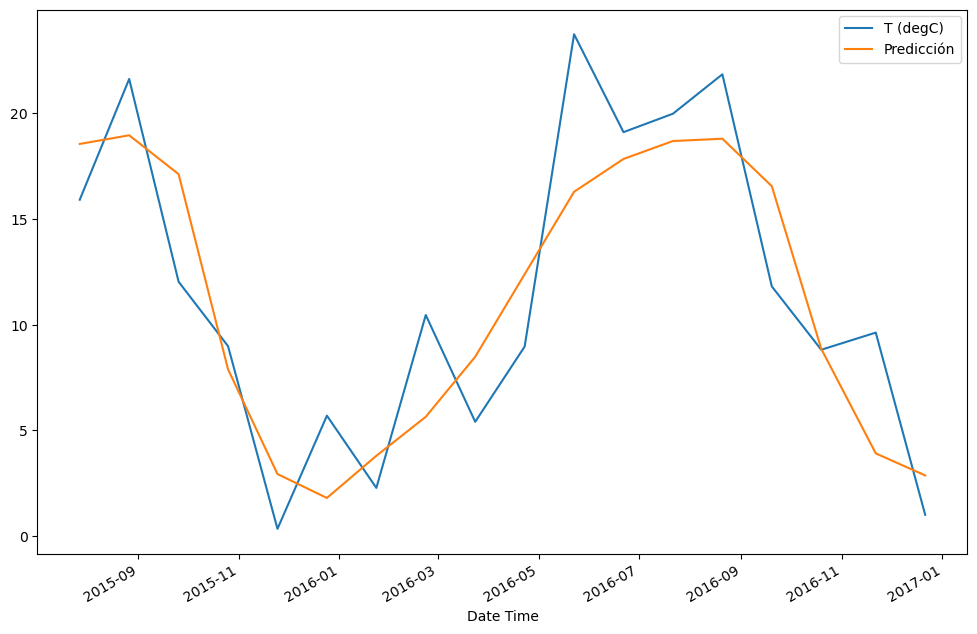

In [72]:
test.plot(figsize=(12,8))

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
np.sqrt(mean_squared_error(test['T (degC)'],test['Predicción']))

np.float64(3.6155909578451335)

## 9.2 Predicción de nuevos datos (forecast)

In [75]:
#Cogemos todos los datos originales y escalamos en base a ellos
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [76]:
longitud = 12 # Longitud de la ventana del batch (en número de timesteps)
tamaño_batch = 1
generador = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=longitud, batch_size=tamaño_batch)

In [78]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(longitud, n_variables)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Ajustamos el modelo, escogemos el número de epochs en base al entrenamiento anterior (no tiene sentido EarlyStopping puesto que no tenemos ahora datos de validación con los que comparar)
model.fit(generador,epochs=15)

Epoch 1/15


C:\Users\Iván Pinar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0726    
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0519 
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0410 
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0303 
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0283 
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0397 
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227 
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207 
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252 
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 
Epoch 13/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 
Epoch 14/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213 
Epoch 15/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 


In [79]:
forecast = []

periodos = 36 # Indicamos el número de periodos en base a la longitud del forecast deseada (36 meses)

primer_batch = scaled_full_data[-longitud:]
batch_actual = primer_batch.reshape((1, longitud, n_variables))

for i in range(periodos):

    pred_actual = model.predict(batch_actual)[0]
    forecast.append(pred_actual) 
    batch_actual = np.append(batch_actual[:,1:,:],[[pred_actual]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

In [80]:
forecast = scaler.inverse_transform(forecast)

Creamos el nuevo índice de tiempos para el forecast

In [81]:
df

,T (degC)
Date Time,
2009-01-01 00:10:00,-8.02
2009-01-31 00:10:00,-2.50
2009-03-02 00:10:00,3.60
2009-04-01 00:10:00,3.05
2009-05-01 00:10:00,9.66
...,...
2016-08-20 10:10:00,21.81
2016-09-19 10:10:00,11.80
2016-10-19 10:10:00,8.81


In [82]:
#Creamos el índice para que empiece en el siguiente timestamp en el que acaban nuestros datos históricos
forecast_index = pd.date_range(start='2017-01-20',periods=periodos,freq='MS') #M

In [83]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [84]:
forecast_df

,Forecast
2017-02-01,4.647118
2017-03-01,6.211746
2017-04-01,9.947092
2017-05-01,15.387143
2017-06-01,17.884818
2017-07-01,18.923422
2017-08-01,19.538683
2017-09-01,18.037521
2017-10-01,12.610320
2017-11-01,10.613819


<Axes: >

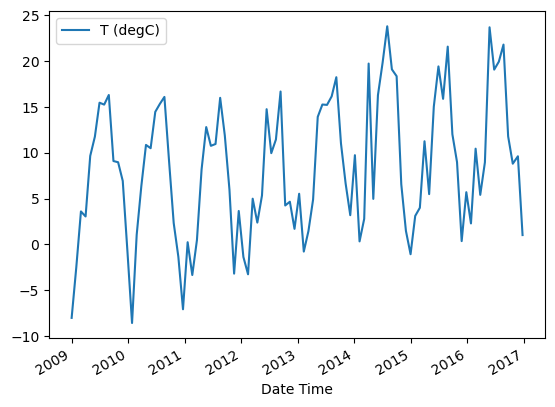

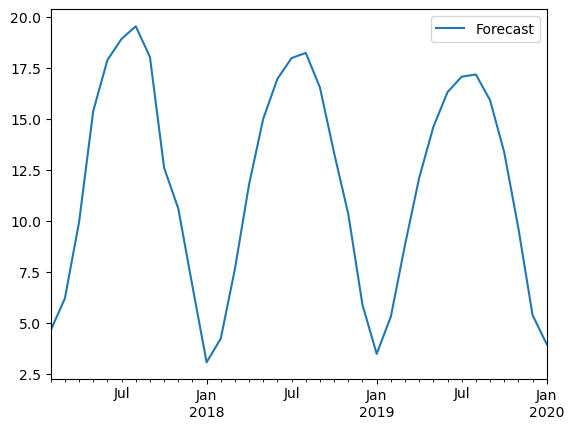

In [85]:
df.plot()
forecast_df.plot()

<Axes: xlabel='Date Time'>

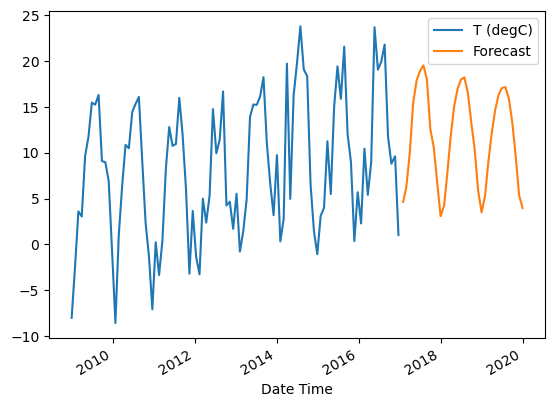

In [86]:
#Unimos ambos plots en la misma figura
ax = df.plot()
forecast_df.plot(ax=ax)

(np.float64(16801.0), np.float64(18262.0))

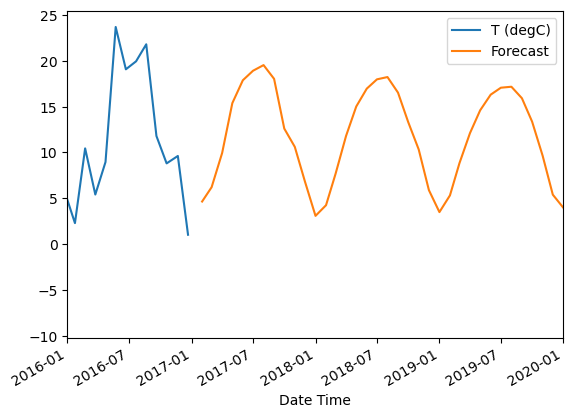

In [87]:
#Hacemos zoom
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2016-01-01','2020-01-01')

In [88]:
from tensorflow.keras.models import load_model

In [89]:
model.save("modelo_forecast.keras")